Objectif : Minimiser les coûts de livraison en déterminant les itinéraires les plus efficaces.

Villes disponibles : Berlin, Hambourg, Dresde, Francfort, Cologne, Stuttgart, Munich, Düsseldorf, Münster


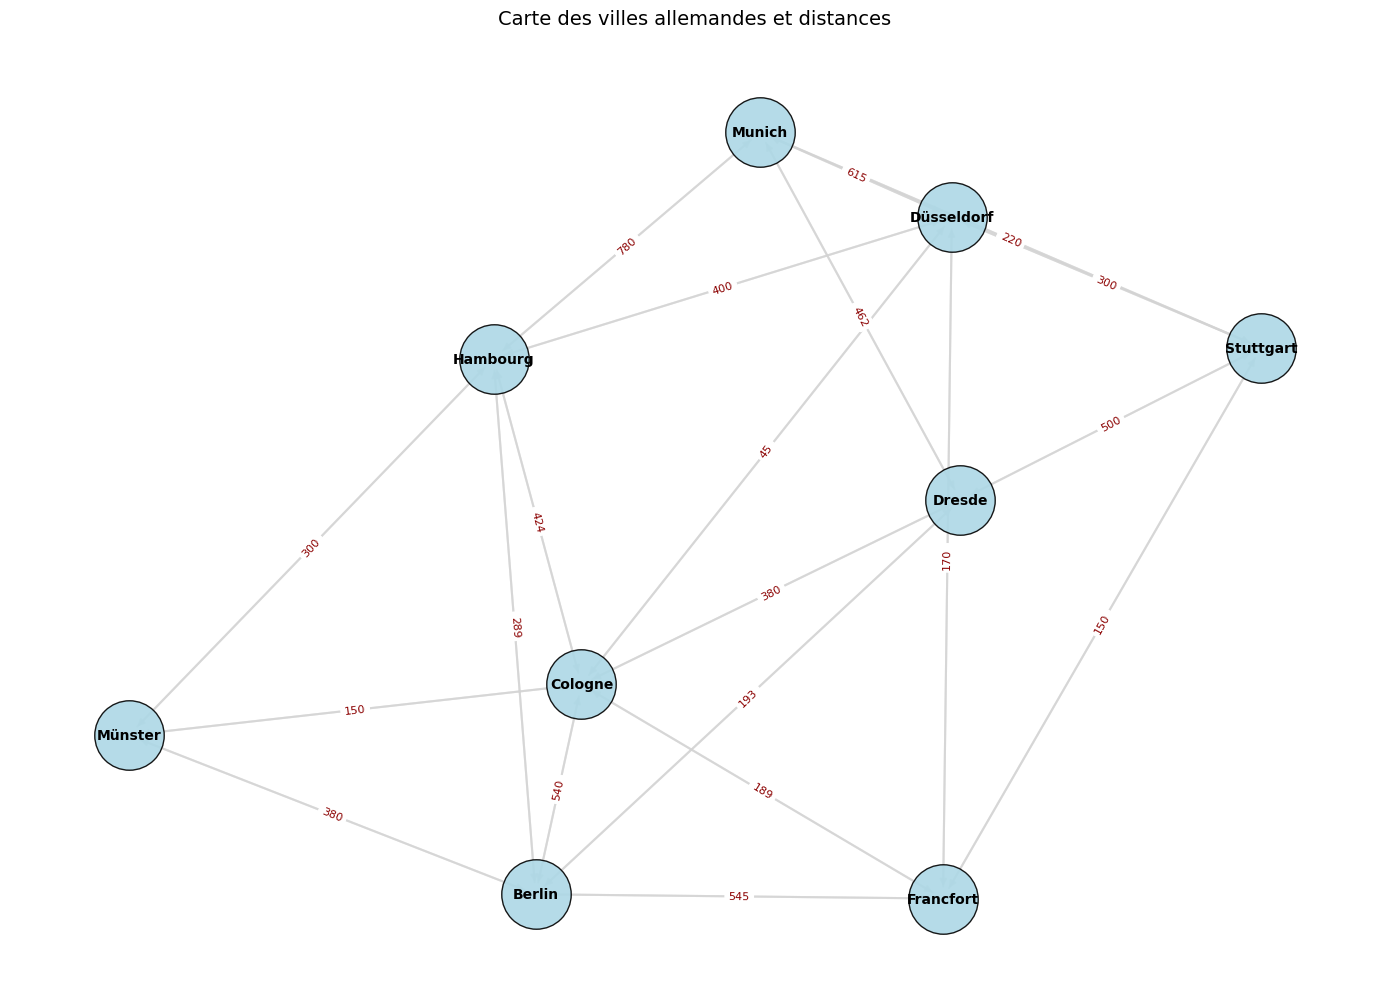


Entrez la ville de départ : berlin
Entrez la ville de destination : dresde

Choisissez l'algorithme :
1 - Recherche en profondeur (DFS)
2 - Recherche en largeur (BFS)
3 - Dijkstra
4 - Bellman-Ford
0 - Quitter
Votre choix : 2

Algorithme utilisé : BFS (Recherche en largeur)

Itinéraire : Berlin → Dresde
Distance totale : 193 km


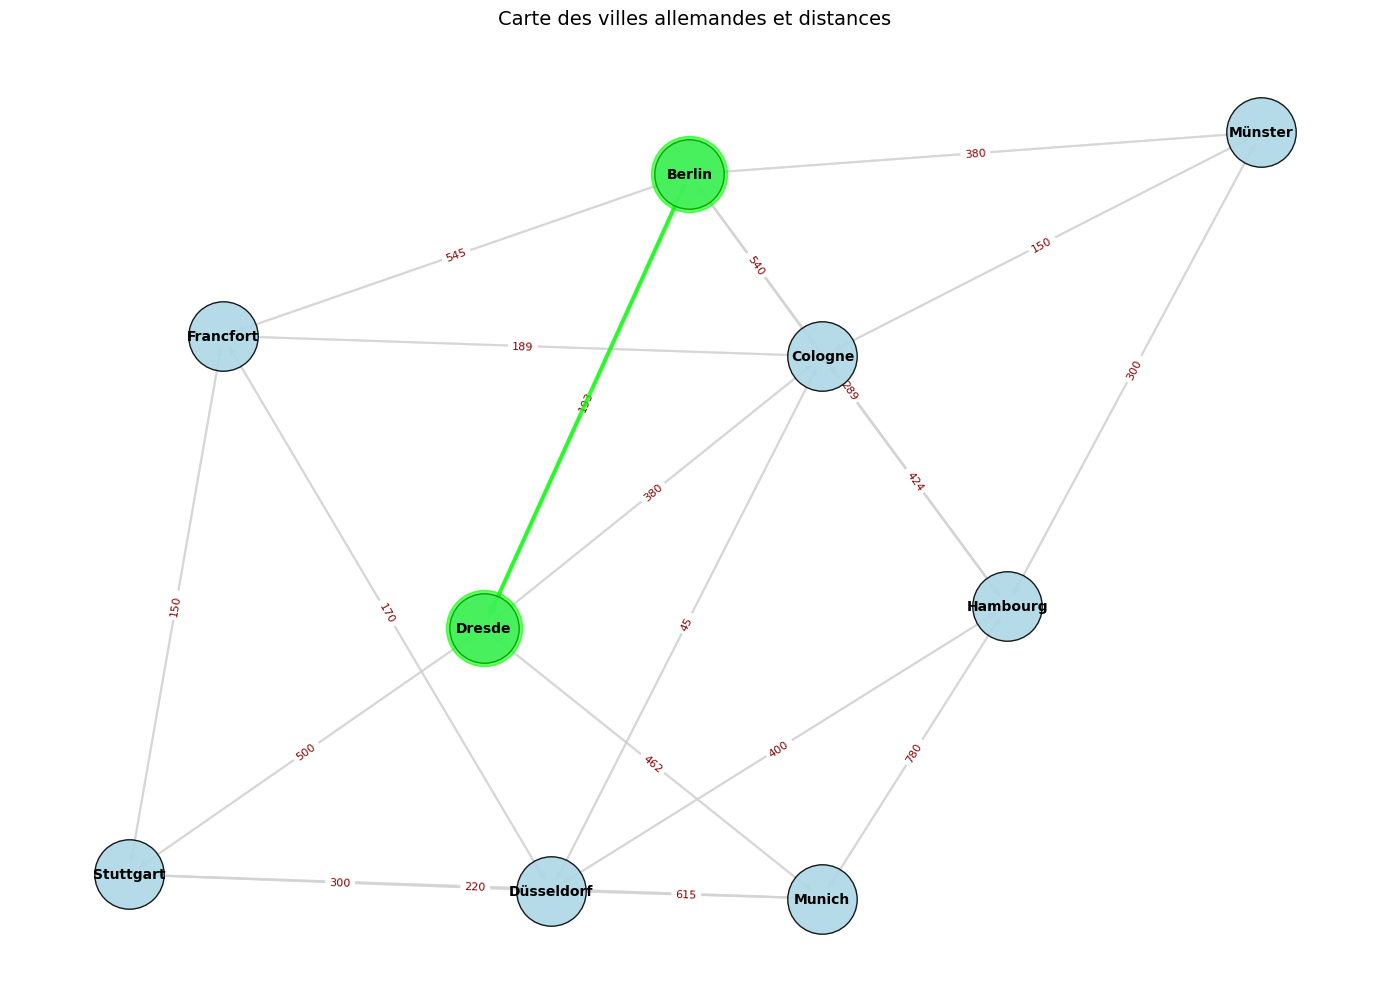

In [1]:
# Projet : Optimisation des itinéraires de livraison en Allemagne
# Objectif : Minimiser les coûts de livraison en déterminant les itinéraires les plus efficaces
# Algorithmes : Dijkstra, Bellman-Ford, DFS, BFS

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def creer_graphe():
    G = nx.DiGraph()
    distances = [
        ("Berlin", "Hambourg", 289),
        ("Berlin", "Dresde", 193),
        ("Berlin", "Francfort", 545),
        ("Hambourg", "Cologne", 424),
        ("Cologne", "Francfort", 189),
        ("Francfort", "Stuttgart", 204),
        ("Stuttgart", "Munich", 220),
        ("Dresde", "Munich", 462),
        ("Düsseldorf", "Cologne", 45),
        ("Munich", "Düsseldorf", 615),
        ("Hambourg", "Munich", 780),
        ("Cologne", "Dresde", 380),
        ("Francfort", "Düsseldorf", 170),
        ("Stuttgart", "Dresde", 500),
        ("Munich", "Hambourg", 780),
        ("Cologne", "Berlin", 540),
        ("Stuttgart", "Francfort", 150),
        ("Düsseldorf", "Stuttgart", 300),
        ("Hambourg", "Düsseldorf", 400),
        ("Berlin", "Münster", 380),
        ("Münster", "Hambourg", 300),
        ("Münster", "Cologne", 150)
    ]
    for from_city, to_city, distance in distances:
        G.add_edge(from_city, to_city, weight=distance)
        G.add_edge(to_city, from_city, weight=distance)
    return G

def dfs(G, start, goal):
    visited = set()
    path = []

    def dfs_rec(node):
        if node == goal:
            path.append(node)
            return True
        visited.add(node)
        path.append(node)
        for neighbor in G.neighbors(node):
            if neighbor not in visited:
                if dfs_rec(neighbor):
                    return True
        path.pop()
        return False

    if dfs_rec(start):
        return path
    else:
        return []

def bfs(G, start, goal):
    visited = set()
    queue = deque([[start]])
    while queue:
        path = queue.popleft()
        node = path[-1]
        if node == goal:
            return path
        elif node not in visited:
            for neighbor in G.neighbors(node):
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
            visited.add(node)
    return []

def calculer_distance(G, chemin):
    distance_totale = 0
    for i in range(len(chemin) - 1):
        distance_totale += G[chemin[i]][chemin[i+1]]['weight']
    return distance_totale

def afficher_resultat(path, length):
    print("\nItinéraire :", " → ".join(path))
    print("Distance totale :", length, "km")

def afficher_graphe(G, chemin=None):
    plt.figure(figsize=(14, 10))
    
    # Position des nœuds avec un layout plus espacé
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    
    # Dessin du graphe de base
    nx.draw_networkx_nodes(G, pos, node_size=2500, node_color='lightblue', edgecolors='black', alpha=0.9)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    # Dessin des arêtes de base en gris clair
    nx.draw_networkx_edges(G, pos, width=1.5, edge_color='lightgray', alpha=0.7)
    
    # Affichage des distances
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='darkred')
    
    # Mise en évidence du chemin si fourni
    if chemin:
        edges = [(chemin[i], chemin[i+1]) for i in range(len(chemin)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=3, edge_color='lime', alpha=0.8)
        nx.draw_networkx_nodes(G, pos, nodelist=chemin, node_size=3000, node_color='lime', alpha=0.6)
    
    plt.title("Carte des villes allemandes et distances", fontsize=14, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    print("Objectif : Minimiser les coûts de livraison en déterminant les itinéraires les plus efficaces.\n")
    G = creer_graphe()
    villes = list(G.nodes())
    print("Villes disponibles :", ", ".join(villes))

    afficher_graphe(G)

    depart = input("\nEntrez la ville de départ : ").strip().capitalize()
    destination = input("Entrez la ville de destination : ").strip().capitalize()

    print("\nChoisissez l'algorithme :")
    print("1 - Recherche en profondeur (DFS)")
    print("2 - Recherche en largeur (BFS)")
    print("3 - Dijkstra")
    print("4 - Bellman-Ford")
    print("0 - Quitter")

    choix = input("Votre choix : ")

    chemin = []
    if choix == "1":
        chemin = dfs(G, depart, destination)
        if chemin:
            distance = calculer_distance(G, chemin)
            print("\nAlgorithme utilisé : DFS (Recherche en profondeur)")
            afficher_resultat(chemin, distance)
        else:
            print("Aucun chemin trouvé avec DFS.")
    elif choix == "2":
        chemin = bfs(G, depart, destination)
        if chemin:
            distance = calculer_distance(G, chemin)
            print("\nAlgorithme utilisé : BFS (Recherche en largeur)")
            afficher_resultat(chemin, distance)
        else:
            print("Aucun chemin trouvé avec BFS.")
    elif choix == "3":
        try:
            chemin = nx.dijkstra_path(G, depart, destination)
            distance = nx.dijkstra_path_length(G, depart, destination)
            print("\nAlgorithme utilisé : Dijkstra (Itinéraire le plus économique)")
            afficher_resultat(chemin, distance)
        except:
            print("Erreur : chemin non trouvé avec Dijkstra.")
    elif choix == "4":
        try:
            chemin = nx.bellman_ford_path(G, depart, destination)
            distance = nx.bellman_ford_path_length(G, depart, destination)
            print("\nAlgorithme utilisé : Bellman-Ford (Itinéraire le plus économique)")
            afficher_resultat(chemin, distance)
        except:
            print("Erreur : chemin non trouvé avec Bellman-Ford.")
    else:
        print("Fin du programme.")
    
    if chemin:
        afficher_graphe(G, chemin)

if __name__ == "__main__":
    main()